In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
df = pd.read_csv("/content/Dataset_Siamak_Yousefi_PLOS_One_2018.csv");

In [ ]:
df.shape

(3162, 448)

In [ ]:
df=df.drop([
'idEye',
'BFS_Ecc',
'BFS_Ecc.1',
'Apex.1',
'Thinnest.4mm.',
'LocationX.2',
'LocationY.2',
'CSI_T.1',
'SD_T.4mm..1',
'CV_T.4mm..1',
'Apex.2',
'Thinnest.4mm..1',
'LocationX.3',
'LocationY.3',
'CSI_T.2',
'SD_T.4mm..2',
'CV_T.4mm..2',
'RMS_E.4mm..2',
'SR_E.4mm..2',
'En.Anterior.',
'ESI.Anterior.'],
axis='columns')

In [ ]:
df.shape

(3162, 427)

In [ ]:
# Label Encoding
for x in range(3162):
  y=df['ESI.Posterior.'][x]
  if y>=0 and y<5:
    df['ESI.Posterior.'][x]=0
  elif y>=5 and y<30:
    df['ESI.Posterior.'][x]=1
  else: df['ESI.Posterior.'][x]=2

<ipython-input-5-dd65c58b21e7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ESI.Posterior.'][x]=1
<ipython-input-5-dd65c58b21e7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ESI.Posterior.'][x]=0
<ipython-input-5-dd65c58b21e7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  else: df['ESI.Posterior.'][x]=2


In [ ]:
df['ESI.Posterior.']

0       1
1       0
2       0
3       1
4       1
       ..
3157    1
3158    1
3159    0
3160    0
3161    0
Name: ESI.Posterior., Length: 3162, dtype: int64

In [ ]:
X = df.iloc[:,0:425]  #independent columns
y = df.iloc[:,-1]

In [ ]:
X

,Unnamed: 0,Ks,Ks.Axis,Kf,Kf.Axis,AvgK,CYL,AA,Ecc.9.0mm.,ACCP,...,SA.C40..4,S35.coma.like..4,S46.sph..like..4,HOAs.S3456..4,coma.5,coma.axis.5,SA.C40..5,S35.coma.like..5,S46.sph..like..5,HOAs.S3456..5
0,9,44.53,21,39.22,111,41.87,5.32,86.7,0.91,41.67,...,0.067,0.988,0.374,1.057,3.131,97,-0.722,3.350,1.053,3.512
1,10,43.84,39,42.46,129,43.15,1.38,88.2,0.65,43.14,...,0.023,0.209,0.190,0.283,0.575,97,0.085,0.921,0.290,0.966
2,39,44.81,66,44.41,156,44.61,0.40,83.0,0.48,44.70,...,-0.098,0.196,0.412,0.456,0.177,9,0.268,0.263,0.640,0.692
3,55,44.00,51,42.31,141,43.15,1.69,97.3,0.60,43.16,...,-0.143,1.111,0.571,1.250,0.492,275,-0.281,3.396,1.419,3.680
4,56,45.42,26,45.20,116,45.31,0.22,93.3,0.69,45.29,...,0.111,0.329,0.205,0.387,0.571,85,0.109,0.691,0.181,0.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3157,12238,46.60,86,45.79,176,46.19,0.81,97.0,0.75,46.18,...,0.184,0.175,0.231,0.290,0.384,339,0.164,0.583,0.259,0.638
3158,12239,44.05,82,43.90,172,43.97,0.15,96.4,0.63,44.00,...,0.054,0.148,0.141,0.204,0.156,217,0.242,0.388,0.387,0.548
3159,12240,44.12,3,43.47,93,43.80,0.66,96.6,0.60,43.82,...,0.132,0.142,0.098,0.173,0.179,337,0.348,0.313,0.384,0.495
3160,12241,46.59,90,44.74,0,45.66,1.86,96.1,0.74,45.77,...,-0.215,0.463,0.607,0.763,0.609,113,-0.124,1.092,0.842,1.379


In [ ]:
y

0       1
1       0
2       0
3       1
4       1
       ..
3157    1
3158    1
3159    0
3160    0
3161    0
Name: ESI.Posterior., Length: 3162, dtype: int64

In [ ]:
#apply SelectKBest class to extract top 10 best features
# bestfeatures = SelectKBest(score_func=chi2, k=50)
# fit = bestfeatures.fit_transform(X,y)
# Feature Selection
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [ ]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.00070957 0.00058653 0.00086497 0.00057299 0.0010568  0.00078217
 0.00073577 0.00062805 0.00074787 0.00101019 0.0006024  0.00109243
 0.00060249 0.00103455 0.00084541 0.00075017 0.0008099  0.00067101
 0.00304765 0.00091251 0.00342914 0.00070894 0.00480698 0.00236164
 0.00080135 0.00099982 0.00049462 0.00069995 0.00071646 0.00079888
 0.00070435 0.00084191 0.00086531 0.0010065  0.00090705 0.00060804
 0.0009533  0.00077239 0.0008058  0.00090595 0.00072178 0.00062603
 0.00076312 0.00119598 0.00143712 0.00080105 0.00141041 0.00074308
 0.00147094 0.00054761 0.00066094 0.00077153 0.00089129 0.00074549
 0.00083922 0.00079554 0.00066559 0.00082111 0.00151132 0.00063236
 0.00079367 0.00131634 0.00199922 0.00078121 0.01717922 0.00097742
 0.00894381 0.00247842 0.00282435 0.00067155 0.01929326 0.0007642
 0.00246027 0.00090835 0.00071565 0.00082898 0.00067954 0.00064861
 0.00063698 0.00069971 0.00075233 0.00081926 0.0006705  0.00066923
 0.00162895 0.00072949 0.00074675 0.00066077 0.0007289  0.00076

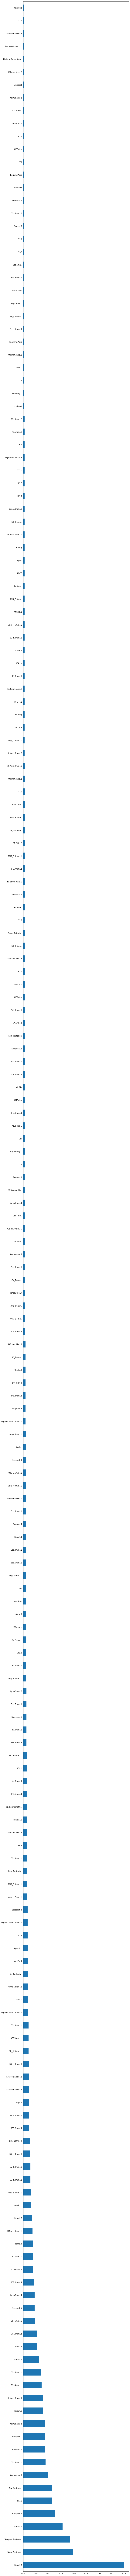

In [ ]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(200).plot(kind='barh',figsize=(10,250))
plt.show()

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3162 entries, 0 to 3161
Columns: 425 entries, Unnamed: 0 to HOAs.S3456..5
dtypes: float64(319), int64(106)
memory usage: 10.3 MB


In [ ]:
X=df[[
'Score.Posterior.',
'Steepest.Posterior.',
'Steepest.3',
'OSI.4mm..1',
'Steepest.1',
'SAI.1',
'Asymmetry.5',
'Asy..Posterior.',
'Asymmetry.4',
'OSI.5mm..1',
'OSI.6mm..1',
'DSI.4mm..1',
'DSI.5mm..1'
]]

In [ ]:
X.shape

(3162, 13)

In [ ]:
y.value_counts()

0    2050
1     787
2     325
Name: ESI.Posterior., dtype: int64

In [ ]:
# from imblearn.over_sampling import SMOTE
# oversample = SMOTE()
# X, y = oversample.fit_resample(X, y)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


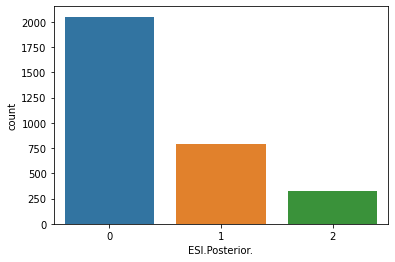

In [ ]:
import seaborn as sn
sn.countplot(y)

In [ ]:
y.value_counts()

0    2050
1     787
2     325
Name: ESI.Posterior., dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
# Initialise the Scaler
scaler = StandardScaler()
# To scale data
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_test,X_train,y_test,y_train=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)
X_test.shape

(2529, 13)

In [ ]:
y_test.shape

(2529,)

In [ ]:
from sklearn import svm
classifier=svm.SVC(kernel='linear',gamma='auto',C=2,probability=True,random_state=0)
classifier.fit(X_train,y_train)

y_predict=classifier.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1640
           1       0.95      0.94      0.94       629
           2       0.98      0.93      0.96       260

    accuracy                           0.97      2529
   macro avg       0.97      0.95      0.96      2529
weighted avg       0.97      0.97      0.97      2529



In [ ]:
Accuracy= metrics.accuracy_score(y_test,y_predict)
Accuracy

0.9723210755239226

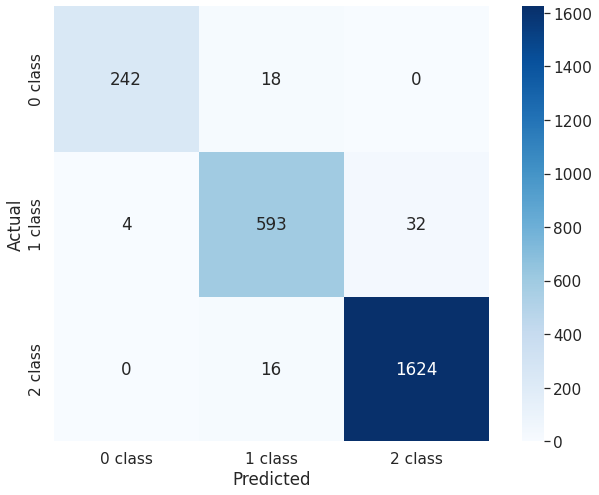

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
confusion_matrix = confusion_matrix(y_test,y_predict)

plt.figure(figsize = (12,8))
sns.set(font_scale=1.4)
ax = sns.heatmap(confusion_matrix, cmap='Blues',annot=True, fmt='d', square=True,xticklabels=['2 class', '1 class','0 class'], yticklabels=['2 class', '1 class','0 class'])
ax.set(xlabel='Predicted', ylabel='Actual')
ax.invert_yaxis()
ax.invert_xaxis()

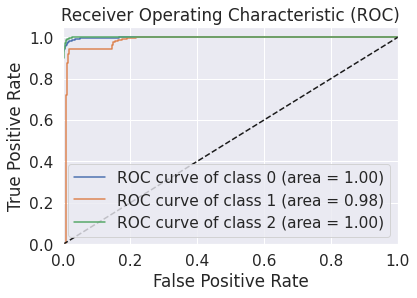

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

y_score = classifier.decision_function(X_test)
n_classes = np.unique(y_test).shape[0]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score[:, i])
    roc_auc[i] = roc_auc_score(y_test == i, y_score[:, i])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
y_predict=classifier.predict(X_train)
from sklearn.metrics import classification_report
print(classification_report(y_train,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       410
           1       1.00      1.00      1.00       158
           2       1.00      1.00      1.00        65

    accuracy                           1.00       633
   macro avg       1.00      1.00      1.00       633
weighted avg       1.00      1.00      1.00       633



In [ ]:
Accuracy= metrics.accuracy_score(y_train,y_predict)
Accuracy

1.0

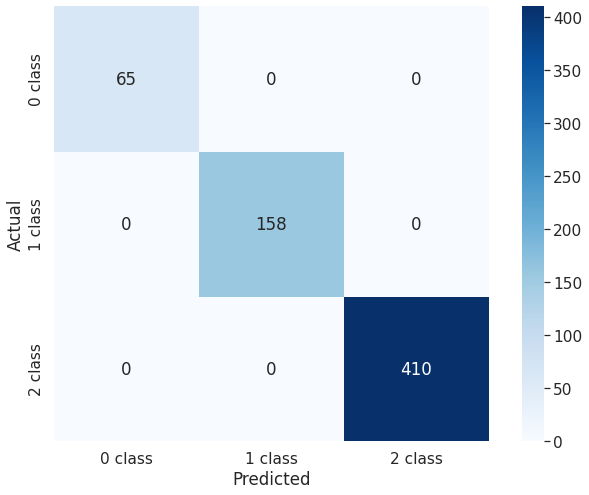

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
confusion_matrix = confusion_matrix(y_train,y_predict)

plt.figure(figsize = (12,8))
sns.set(font_scale=1.4)
ax = sns.heatmap(confusion_matrix, cmap='Blues',annot=True, fmt='d', square=True,xticklabels=['2 class', '1 class','0 class'], yticklabels=['2 class', '1 class','0 class'])
ax.set(xlabel='Predicted', ylabel='Actual')
ax.invert_yaxis()
ax.invert_xaxis()

In [ ]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy(testing)):",metrics.accuracy_score(y_test, y_pred))

Accuracy(testing)): 0.9992091735863978


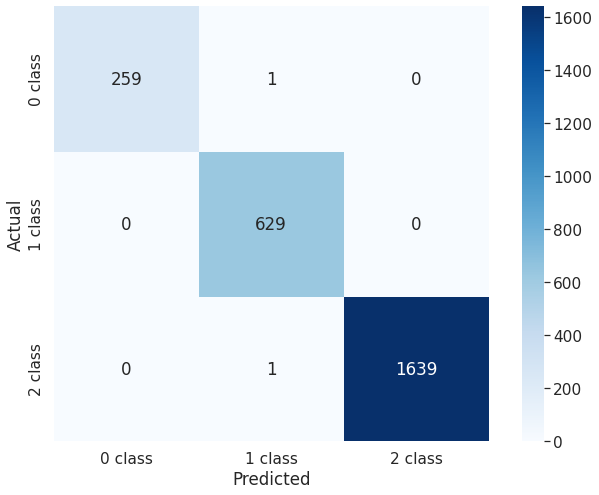

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
confusion_matrix = confusion_matrix(y_test,y_pred)

plt.figure(figsize = (12,8))
sns.set(font_scale=1.4)
ax = sns.heatmap(confusion_matrix, cmap='Blues',annot=True, fmt='d', square=True,xticklabels=['2 class', '1 class','0 class'], yticklabels=['2 class', '1 class','0 class'])
ax.set(xlabel='Predicted', ylabel='Actual')
ax.invert_yaxis()
ax.invert_xaxis()

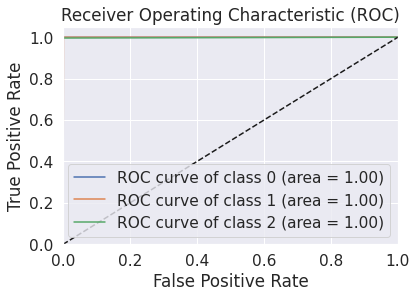

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X_train, y_train)

y_score = classifier.predict_proba(X_test)
n_classes = np.unique(y_test).shape[0]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score[:, i])
    roc_auc[i] = roc_auc_score(y_test == i, y_score[:, i])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9980229339659945


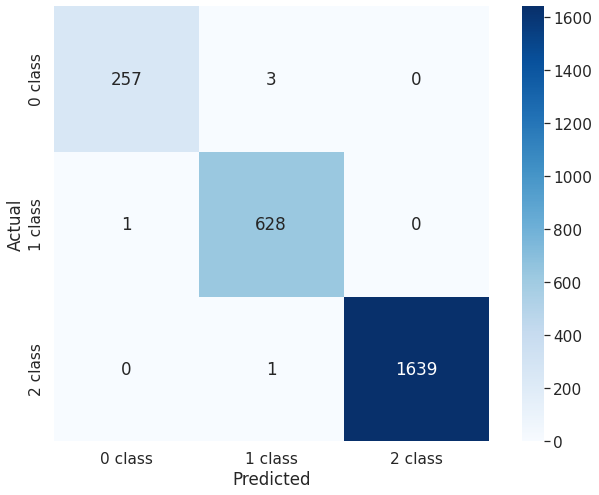

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
confusion_matrix = confusion_matrix(y_test,y_pred)

plt.figure(figsize = (12,8))
sns.set(font_scale=1.4)
ax = sns.heatmap(confusion_matrix, cmap='Blues',annot=True, fmt='d', square=True,xticklabels=['2 class', '1 class','0 class'], yticklabels=['2 class', '1 class','0 class'])
ax.set(xlabel='Predicted', ylabel='Actual')
ax.invert_yaxis()
ax.invert_xaxis()

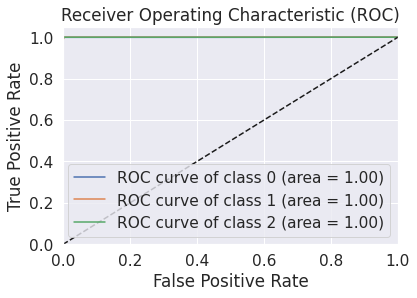

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

classifier = RandomForestClassifier(random_state=0)
classifier.fit(X_train, y_train)

y_score = classifier.predict_proba(X_test)
n_classes = np.unique(y_test).shape[0]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score[:, i])
    roc_auc[i] = roc_auc_score(y_test == i, y_score[:, i])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train, y_train)
preds = xgb.predict(X_test)
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))

XGBoost's prediction accuracy is: 99.92


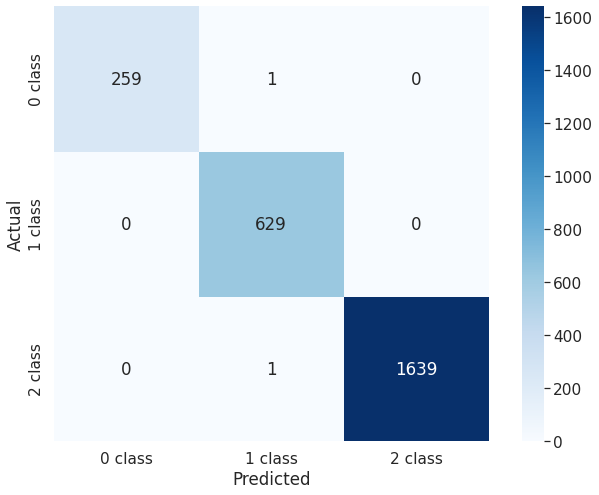

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
confusion_matrix = confusion_matrix(y_test,preds)

plt.figure(figsize = (12,8))
sns.set(font_scale=1.4)
ax = sns.heatmap(confusion_matrix, cmap='Blues',annot=True, fmt='d', square=True,xticklabels=['2 class', '1 class','0 class'], yticklabels=['2 class', '1 class','0 class'])
ax.set(xlabel='Predicted', ylabel='Actual')
ax.invert_yaxis()
ax.invert_xaxis()

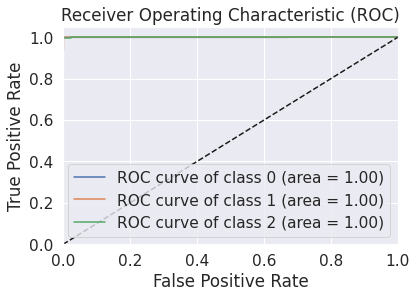

In [ ]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

classifier = xgb.XGBClassifier(objective='binary:logistic')
classifier.fit(X_train, y_train)

y_score = classifier.predict_proba(X_test)
n_classes = np.unique(y_test).shape[0]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score[:, i])
    roc_auc[i] = roc_auc_score(y_test == i, y_score[:, i])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=100,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = model.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9992091735863978


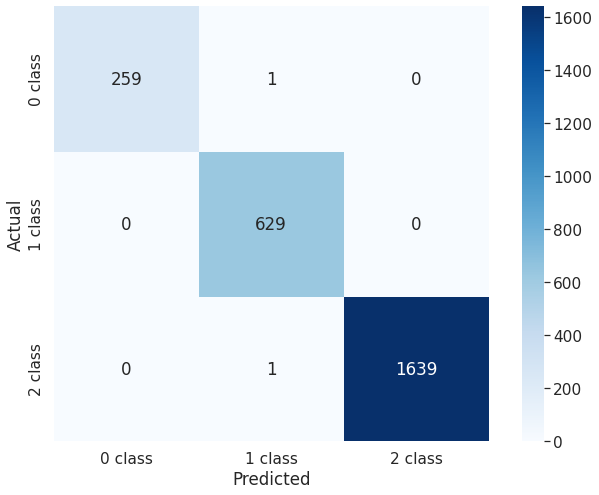

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
confusion_matrix = confusion_matrix(y_test,y_pred)

plt.figure(figsize = (12,8))
sns.set(font_scale=1.4)
ax = sns.heatmap(confusion_matrix, cmap='Blues',annot=True, fmt='d', square=True,xticklabels=['2 class', '1 class','0 class'], yticklabels=['2 class', '1 class','0 class'])
ax.set(xlabel='Predicted', ylabel='Actual')
ax.invert_yaxis()
ax.invert_xaxis()

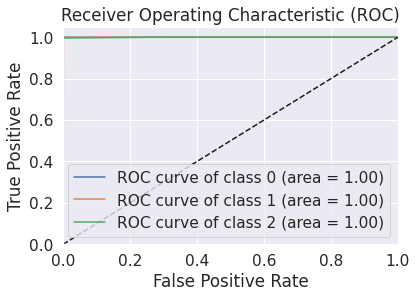

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

classifier = AdaBoostClassifier(random_state=0)
classifier.fit(X_train, y_train)

y_score = classifier.decision_function(X_test)
n_classes = np.unique(y_test).shape[0]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score[:, i])
    roc_auc[i] = roc_auc_score(y_test == i, y_score[:, i])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
# Import Support Vector Classifier
from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
svc=SVC(probability=True, kernel='linear')
# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=10, base_estimator=svc,learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = model.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9470146302886516


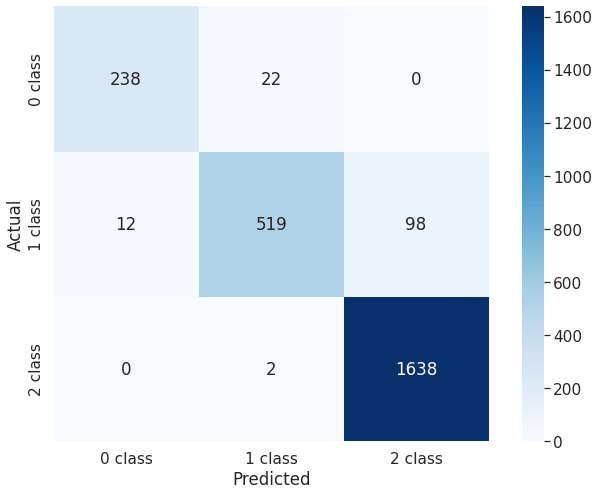

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
confusion_matrix = confusion_matrix(y_test,y_pred)

plt.figure(figsize = (12,8))
sns.set(font_scale=1.4)
ax = sns.heatmap(confusion_matrix, cmap='Blues',annot=True, fmt='d', square=True,xticklabels=['2 class', '1 class','0 class'], yticklabels=['2 class', '1 class','0 class'])
ax.set(xlabel='Predicted', ylabel='Actual')
ax.invert_yaxis()
ax.invert_xaxis()

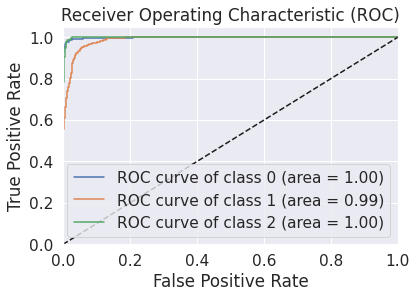

In [ ]:
y_score = model.decision_function(X_test)
n_classes = np.unique(y_test).shape[0]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score[:, i])
    roc_auc[i] = roc_auc_score(y_test == i, y_score[:, i])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt
# import seaborn as sns; sns.set()
# import numpy as np
# kmeans = KMeans(n_clusters=3)
# kmeans.fit(X)
# y_kmeans = kmeans.predict(X)

In [ ]:
# plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=20, cmap='summer')
# centers = kmeans.cluster_centers_
# plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=100, alpha=0.9);
# # plt.figure(figsize=(30, 15))
# plt.show()


In [ ]:
# X_train.shape
# y_train.shape

In [ ]:
# Applying PCA function on training
# and testing set of X component
# from sklearn.decomposition import PCA

# pca = PCA(n_components = 2)

# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

# explained_variance = pca.explained_variance_ratio_

In [ ]:
# Fitting Logistic Regression To the training set
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
# Predicting the test set result using
# predict function under LogisticRegression
y_pred = classifier.predict(X_test)
#Predict the response for test dataset
# y_pred = model.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9580862000790826


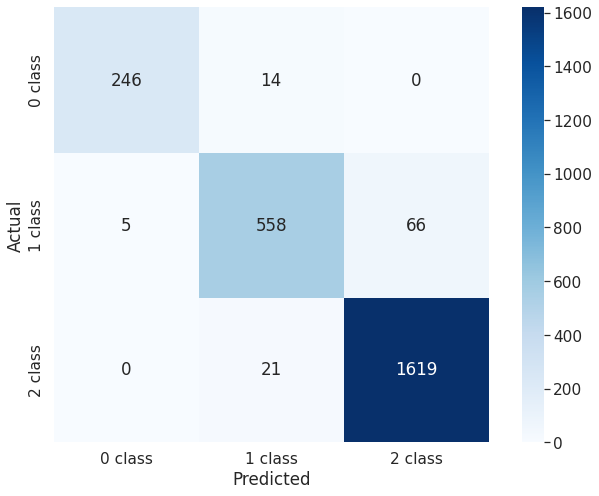

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
confusion_matrix = confusion_matrix(y_test,y_pred)

plt.figure(figsize = (12,8))
sns.set(font_scale=1.4)
ax = sns.heatmap(confusion_matrix, cmap='Blues',annot=True, fmt='d', square=True,xticklabels=['2 class', '1 class','0 class'], yticklabels=['2 class', '1 class','0 class'])
ax.set(xlabel='Predicted', ylabel='Actual')
ax.invert_yaxis()
ax.invert_xaxis()

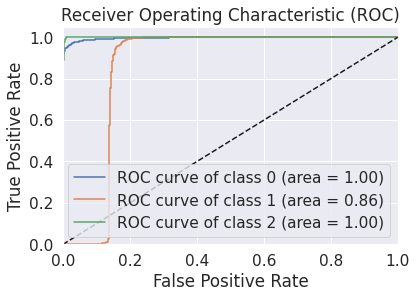

In [ ]:
y_score = classifier.decision_function(X_test)
n_classes = np.unique(y_test).shape[0]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score[:, i])
    roc_auc[i] = roc_auc_score(y_test == i, y_score[:, i])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# making confusion matrix between
# test set of Y and predicted value.
# from sklearn.metrics import confusion_matrix

# cm = confusion_matrix(y_test, y_pred)

In [ ]:
# Predicting the training set
# result through scatter plot
# from matplotlib.colors import ListedColormap

# X_set, y_set = X_train, y_train
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
# 					stop = X_set[:, 0].max() + 1, step = 0.01),
# 					np.arange(start = X_set[:, 1].min() - 1,
# 					stop = X_set[:, 1].max() + 1, step = 0.01))

# plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
# 			X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
# 			cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())

# for i, j in enumerate(np.unique(y_set)):
# 	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
# 				c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

# plt.title('Logistic Regression (Training set)')
# plt.xlabel('PC1') # for Xlabel
# plt.ylabel('PC2') # for Ylabel
# plt.legend() # to show legend

# # show scatter plot
# plt.show()

In [ ]:
# Visualising the Test set results through scatter plot
# from matplotlib.colors import ListedColormap

# X_set, y_set = X_test, y_test

# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
# 					stop = X_set[:, 0].max() + 1, step = 0.01),
# 					np.arange(start = X_set[:, 1].min() - 1,
# 					stop = X_set[:, 1].max() + 1, step = 0.01))

# plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
# 			X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
# 			cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())

# for i, j in enumerate(np.unique(y_set)):
# 	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
# 				c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

# # title for scatter plot
# plt.title('Logistic Regression (Test set)')
# plt.xlabel('PC1') # for Xlabel
# plt.ylabel('PC2') # for Ylabel
# plt.legend()

# # show scatter plot
# plt.show()

In [ ]:
# ANN
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Define the model architecture
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train the model
model.fit(X, y, epochs=100)
# predictions
y_pred = model.predict(X)

# convert one-hot encoding back to class labels
# y_pred = np.argmax(y_pred, axis=0)
# y_true = np.argmax(y, axis=0)


Epoch 1/100
99/99 [==============================] - 1s 1ms/step - loss: 0.3807 - accuracy: 0.8403
Epoch 2/100
99/99 [==============================] - 0s 1ms/step - loss: 0.1487 - accuracy: 0.9494
Epoch 3/100
99/99 [==============================] - 0s 1ms/step - loss: 0.0878 - accuracy: 0.9722
Epoch 4/100
99/99 [==============================] - 0s 1ms/step - loss: 0.0689 - accuracy: 0.9782
Epoch 5/100
99/99 [==============================] - 0s 1ms/step - loss: 0.0576 - accuracy: 0.9807
Epoch 6/100
99/99 [==============================] - 0s 1ms/step - loss: 0.0571 - accuracy: 0.9798
Epoch 7/100
99/99 [==============================] - 0s 1ms/step - loss: 0.0489 - accuracy: 0.9836
Epoch 8/100
99/99 [==============================] - 0s 1ms/step - loss: 0.0462 - accuracy: 0.9817
Epoch 9/100
99/99 [==============================] - 0s 1ms/step - loss: 0.0429 - accuracy: 0.9842
Epoch 10/100
99/99 [==============================] - 0s 1ms/step - loss: 0.0457 - accuracy: 0.9823
Epoch 11/

99/99 [==============================] - 0s 798us/step


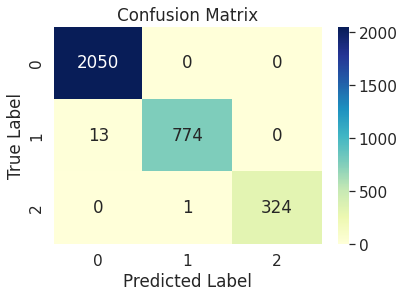

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# predict the target values using the trained model
y_pred = model.predict(X)

# convert the predicted probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

# calculate the confusion matrix
conf_mat = confusion_matrix(y, y_pred)

# Plot the confusion matrix using seaborn library
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


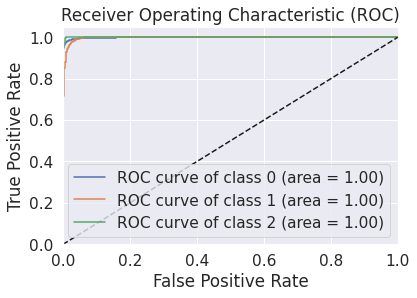

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

classifier = MLPClassifier(random_state=0)
classifier.fit(X_train, y_train)

y_score = classifier.predict_proba(X_test)
n_classes = np.unique(y_test).shape[0]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score[:, i])
    roc_auc[i] = roc_auc_score(y_test == i, y_score[:, i])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

Epoch 1/50
80/80 [==============================] - 1s 4ms/step - loss: 0.4668 - accuracy: 0.7916 - val_loss: 0.2544 - val_accuracy: 0.8799
Epoch 2/50
80/80 [==============================] - 0s 2ms/step - loss: 0.1863 - accuracy: 0.9253 - val_loss: 0.1334 - val_accuracy: 0.9605
Epoch 3/50
80/80 [==============================] - 0s 2ms/step - loss: 0.1120 - accuracy: 0.9620 - val_loss: 0.0970 - val_accuracy: 0.9668
Epoch 4/50
80/80 [==============================] - 0s 2ms/step - loss: 0.0813 - accuracy: 0.9747 - val_loss: 0.0752 - val_accuracy: 0.9716
Epoch 5/50
80/80 [==============================] - 0s 2ms/step - loss: 0.0664 - accuracy: 0.9794 - val_loss: 0.0653 - val_accuracy: 0.9747
Epoch 6/50
80/80 [==============================] - 0s 3ms/step - loss: 0.0595 - accuracy: 0.9794 - val_loss: 0.0580 - val_accuracy: 0.9763
Epoch 7/50
80/80 [==============================] - 0s 3ms/step - loss: 0.0519 - accuracy: 0.9818 - val_loss: 0.0577 - val_accuracy: 0.9747
Epoch 8/50
80/80 [==

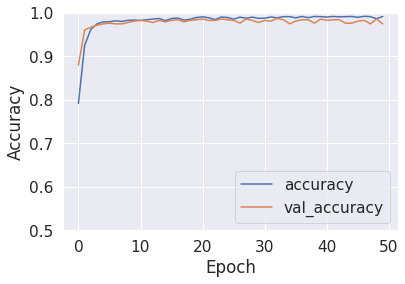

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

# Define the model architecture
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val))

# Plot the learning curve
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
# Train the individual models
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(x_train, y_train)

dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

ann_model = MLPClassifier(hidden_layer_sizes=(64, 128, 256), activation='relu')
ann_model.fit(x_train, y_train)

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(x_train, y_train)

# Make predictions using the individual models
svm_preds = svm_model.predict(x_val)
dt_preds = dt_model.predict(x_val)
ann_preds = ann_model.predict(x_val)
rf_preds = rf_model.predict(x_val)
# Combine the predictions using majority voting
ensemble_preds = np.array([])
for i in range(len(x_val)):
    predictions = [svm_preds[i], dt_preds[i], ann_preds[i], rf_preds[i]]
    ensemble_preds = np.append(ensemble_preds, max(set(predictions), key=predictions.count))

# Evaluate the ensemble model
ensemble_accuracy = accuracy_score(y_val, ensemble_preds)
print('Ensemble Accuracy(maximum): ', ensemble_accuracy)
# Combine the predictions using average
ensemble_preds = (svm_preds + dt_preds + ann_preds + rf_preds) / 4
ensemble_preds = np.round(ensemble_preds)
# Evaluate the ensemble model
ensemble_accuracy = accuracy_score(y_val, ensemble_preds)
print('Ensemble Accuracy(average): ', ensemble_accuracy)


Ensemble Accuracy(maximum):  0.995260663507109
Ensemble Accuracy(average):  0.9936808846761453


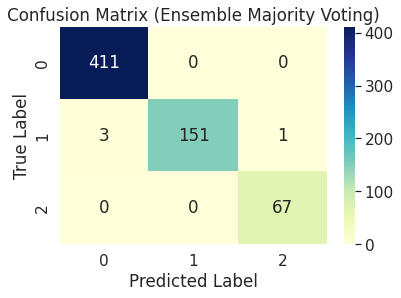

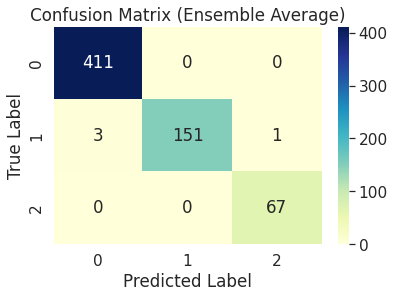

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix for the majority voting ensemble model
ensemble_conf_matrix = confusion_matrix(y_val, ensemble_preds)

# Plot the confusion matrix using seaborn library
sns.heatmap(ensemble_conf_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Ensemble Majority Voting)')
plt.show()

# Generate the confusion matrix for the average ensemble model
ensemble_conf_matrix = confusion_matrix(y_val, ensemble_preds)

# Plot the confusion matrix using seaborn library
sns.heatmap(ensemble_conf_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Ensemble Average)')
plt.show()


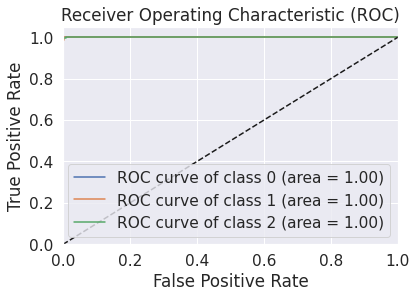

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

classifiers = [    SVC(kernel='linear', gamma='auto', C=2, probability=True),    DecisionTreeClassifier(random_state=0),    MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000),    RandomForestClassifier(random_state=0)]

n_classifiers = len(classifiers)
y_score = np.zeros((len(X_test), n_classifiers, 3))
n_classes = np.unique(y_test).shape[0]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i, classifier in enumerate(classifiers):
    classifier.fit(X_train, y_train)
    y_score[:, i, :] = classifier.predict_proba(X_test)

plt.figure()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score[:, :, i].mean(axis=1))
    roc_auc[i] = roc_auc_score(y_test == i, y_score[:, :, i].mean(axis=1))

    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()